<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/Projects/loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
df.shape
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")


Data has 381 rows and 13 columns.


In [ ]:
# check for missing values
missing_values = df.isna().values.any()
print(f"Missing values in the data frame? : {missing_values}")

Missing values in the data frame? : True


In [ ]:
#no. of missing values per column
df.isna().values.sum()


75

In [ ]:
# Replace '3+' with a numerical representation
df['Dependents'] = df['Dependents'].replace('3+', 3)
# df['Dependents'] = df['Dependents'].astype(object)

# Make df['Credit_History'] as object datatype
df['Credit_History'] = df['Credit_History'].astype(object)

# Make df['ApplicantIncome'] as float datatype
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)

# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
str_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# For string column
categorical_col = df.loc[:,df.dtypes==object]
str_mean.fit(categorical_col)

categorical_cols = categorical_col.columns

categorical_col = str_mean.transform(categorical_col)
categorical_col = pd.DataFrame(categorical_col, columns =categorical_cols)
# pd.DataFrame(categorical_col).isna().values.any()

# For Numerical Columns
num_col = df.loc[:,df.dtypes!=object]
num_cols = num_col.columns

num_mean.fit(num_col)

num_col = num_mean.transform(num_col)
num_col = pd.DataFrame(num_col,columns =num_cols)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    float64
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    object 
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), object(9)
memory usage: 38.8+ KB


In [ ]:
categorical_col

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3,Graduate,No,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
379,LP002979,Male,Yes,3,Graduate,No,1.0,Rural,Y


In [ ]:
clean_df = pd.concat([categorical_col,num_col],axis=1)
clean_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,4583.0,1508.0,128.0,360.0
1,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,0.0,66.0,360.0
2,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2583.0,2358.0,120.0,360.0
3,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,0.0,141.0,360.0
4,LP001013,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2333.0,1516.0,95.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3,Graduate,No,1.0,Urban,Y,5703.0,0.0,128.0,360.0
377,LP002974,Male,Yes,0,Graduate,No,1.0,Rural,Y,3232.0,1950.0,108.0,360.0
378,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y,2900.0,0.0,71.0,360.0
379,LP002979,Male,Yes,3,Graduate,No,1.0,Rural,Y,4106.0,0.0,40.0,180.0


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   Credit_History     381 non-null    object 
 7   Property_Area      381 non-null    object 
 8   Loan_Status        381 non-null    object 
 9   ApplicantIncome    381 non-null    float64
 10  CoapplicantIncome  381 non-null    float64
 11  LoanAmount         381 non-null    float64
 12  Loan_Amount_Term   381 non-null    float64
dtypes: float64(4), object(9)
memory usage: 38.8+ KB


In [ ]:
print(f"Data has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

Data has 381 rows and 13 columns.


In [ ]:
# check for missing values
missing_values = clean_df.isna().values.any()
print(f"Missing values in the clean data frame? : {missing_values}")

Missing values in the clean data frame? : False


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt

clean_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

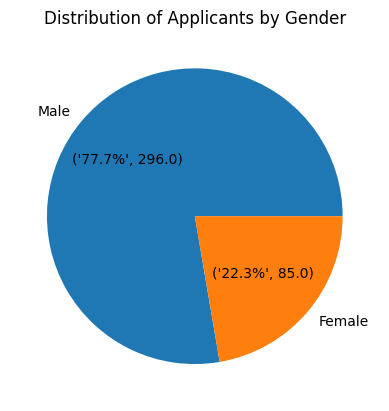

In [ ]:
# Bar Chart
gender_count = clean_df['Gender'].value_counts()
labels = ['Male', 'Female']
values_list = [gender_count['Male'], gender_count['Female']]

total = gender_count.sum()

def fmt(x):
  return str(round(x,1)) + "%", round(total*x/100,2)

plt.pie(values_list,labels=labels,autopct=fmt)
plt.title("Distribution of Applicants by Gender")
plt.show()


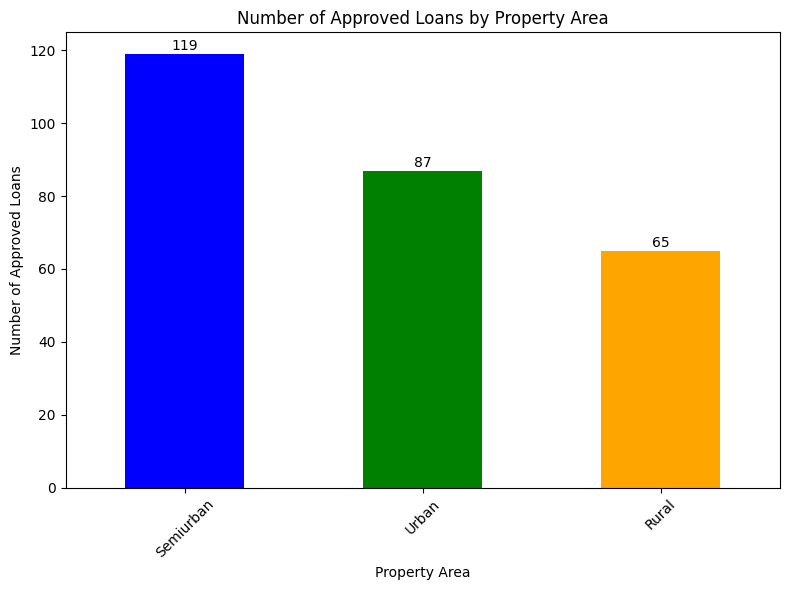

In [ ]:
# Plotting Number of Approved Loans by Property Type
approved_loans = clean_df[clean_df['Loan_Status'] == 'Y']
loan_counts = approved_loans['Property_Area'].value_counts()

plt.figure(figsize=(8, 6))
loan_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Number of Approved Loans by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Approved Loans')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding text labels on top of each bar
for i in range(len(loan_counts)):
  # plt.text( x-coordinate of the text label,y-coordinate of the text label,text that is isplayed on top,horizontal alignment of the text)
  # +1 to position the text label slightly above the top of the bar
  plt.text(i, loan_counts[i] + 1, str(loan_counts[i]), ha='center')

plt.show()

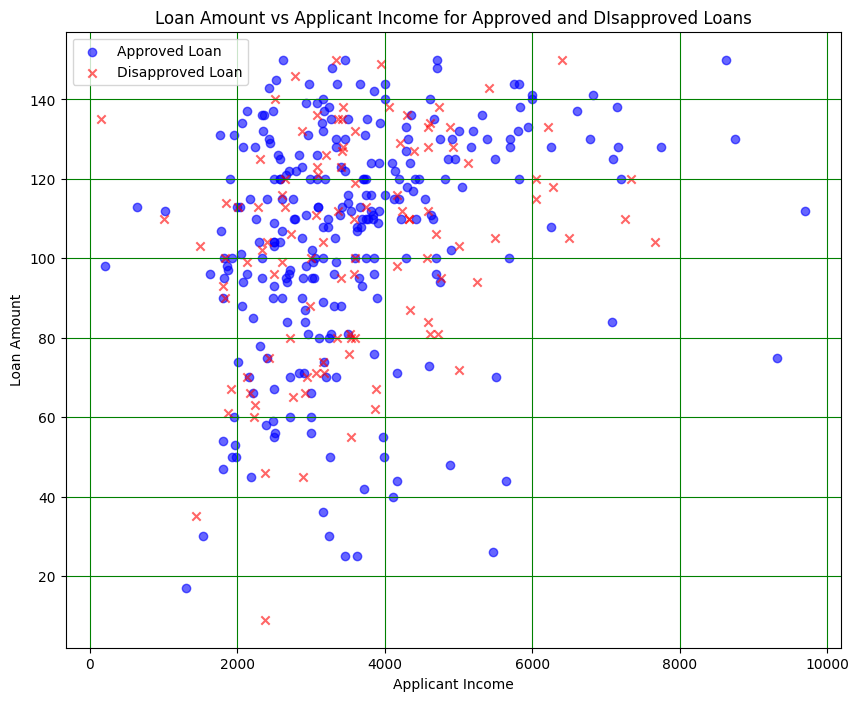

In [ ]:
# Scatter Plot
# Approved Loan: Income vs Loan
# Not-Approved Loan: Income vs Loan
approved_loans = clean_df[clean_df['Loan_Status'] == 'Y']
disapproved_loans = clean_df[clean_df['Loan_Status'] == 'N']

plt.figure(figsize=(10,8))
plt.scatter(approved_loans['ApplicantIncome'],approved_loans['LoanAmount'],label="Approved Loan",color='blue',alpha=0.6, marker='o')
plt.scatter(disapproved_loans['ApplicantIncome'],disapproved_loans['LoanAmount'],label="Disapproved Loan",color='red',alpha=0.6, marker='x')

plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Applicant Income for Approved and DIsapproved Loans")
plt.legend()
plt.grid(color='green')
plt.show()


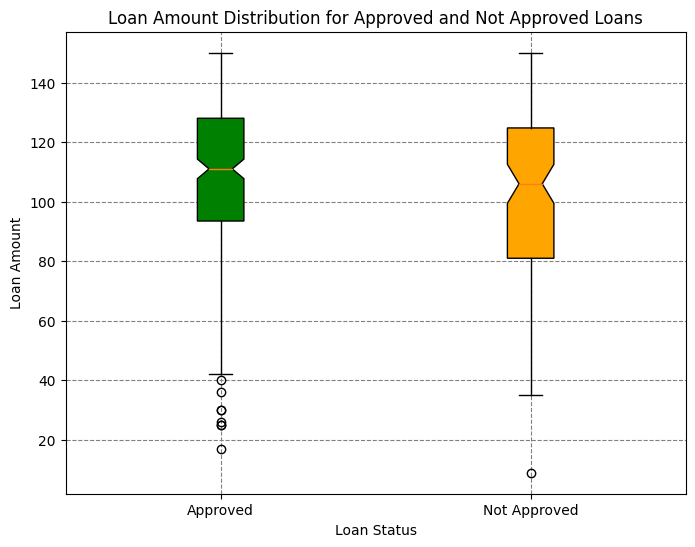

In [ ]:
# DataFrame for approved loans
approved_loans = clean_df[clean_df['Loan_Status'] == 'Y']
not_approved_loans = clean_df[clean_df['Loan_Status'] == 'N']

plt.figure(figsize=(8, 6))
box = plt.boxplot([approved_loans['LoanAmount'],
             not_approved_loans['LoanAmount']],notch=True,patch_artist=True,
            labels=['Approved', 'Not Approved'])
colors = ['green','orange']
#change color of the boxes in boxplot
for patch, color in zip(box['boxes'],colors):
  patch.set_facecolor(color)
# Add title and labels
plt.title('Loan Amount Distribution for Approved and Not Approved Loans')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.grid(color='grey', linestyle='--')
plt.show()

In [ ]:
# Data Preprocessing (Scaling)

# Label Data
Y = clean_df['Loan_Status']

# Features Data
X = clean_df.drop(['Loan_Status'],axis=1)

# pick the columns with string datas only
categorical_features = X.loc[:,X.dtypes==object]
categorical_col = categorical_features.columns
numerical_features = X.loc[:,X.dtypes!=object]

categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_ID         381 non-null    object
 1   Gender          381 non-null    object
 2   Married         381 non-null    object
 3   Dependents      381 non-null    object
 4   Education       381 non-null    object
 5   Self_Employed   381 non-null    object
 6   Credit_History  381 non-null    object
 7   Property_Area   381 non-null    object
dtypes: object(8)
memory usage: 23.9+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# bringing the numerical datas to normal range
scaler = StandardScaler()
scaler.fit(numerical_features)
print(scaler.mean_)

numerical_features = scaler.transform(numerical_features)

# One hot encoding for categorical features
categorical_features = categorical_features.astype(str)
# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(categorical_features)
#print(ENCODER.categories_)
encoded_categorical_features = ENCODER.transform(categorical_features).toarray()

# Concatenate both numerical features and encoded categorical features
features_data = np.concatenate([numerical_features,encoded_categorical_features],axis=1)

[3579.84514436 1277.27538055  104.98687664  340.86486486]


In [ ]:
# One hot encoding for Label
label_encoded = []
for k in Y:
  if k=='Y':
    label_encoded.append(0)
  elif k == 'N':
    label_encoded.append(1)

print(label_encoded)

#reshape(#rows,#columns)
# -1 allows NumPy to figure out how many rows are needed to fit all the elements into a single column
label_array = np.array(label_encoded).reshape(-1,1)

# ENCODER = OneHotEncoder()
ENCODER.fit(label_array)
print(ENCODER.categories_)
encoded_Y = ENCODER.transform(label_array).toarray()


[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_data,encoded_Y,test_size=.2)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Model TRAINING; pass features and labels
knn.fit(X_train,y_train)

# Model PREDICTION. Pass Testing features only.
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test[1])

# Convert arrays to lists for comparison
y_pred_list = pred_labels_knn.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_knn = 0
for x in range(len(pred_labels_knn)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_knn += 1
accuracy_knn = round(accuracy_knn/len(pred_labels_knn)*100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

[1. 0.]
[1. 0.]
The accuracy of the KNN Model is 74.03%


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)

# Convert arrays to lists for comparison
y_pred_list = pred_labels_dec_tree.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_decision_tree = 0
for x in range(len(pred_labels_dec_tree)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_decision_tree += 1
accuracy_decision_tree = round(accuracy_decision_tree/len(pred_labels_dec_tree)*100,2)
print(f"The accuracy of the Decision Tree Model is {accuracy_decision_tree}%")

The accuracy of the Decision Tree Model is 77.92%


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape

# Convert arrays to lists for comparison
y_pred_list = pred_lbls_rf.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_random_forest = 0
for x in range(len(y_pred_list)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_random_forest += 1
accuracy_random_forest = round(accuracy_random_forest/len(y_pred_list)*100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_random_forest}%")

The accuracy of the Random Forest Model is 80.52%


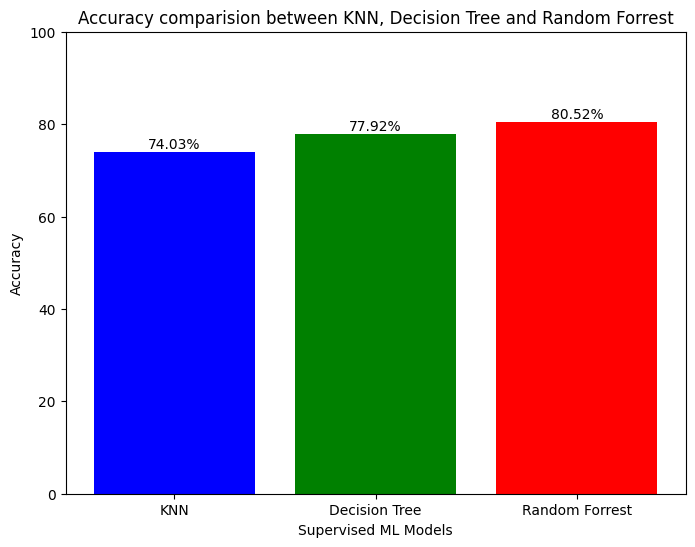

In [ ]:
# Comparision of all accuracies with a bar chart
x_labels = ['KNN', 'Decision Tree','Random Forrest']
y_values = [accuracy_knn, accuracy_decision_tree,accuracy_random_forest]

plt.figure(figsize=(8, 6))
plt.bar(x_labels,y_values,color=['blue','green','red'])
# show value on top of each bar
for index, value in enumerate(y_values):
    plt.text(index, value, str(value)+'%', ha='center', va='bottom')

plt.ylim(0,100)
plt.xlabel('Supervised ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparision between KNN, Decision Tree and Random Forrest')

plt.show()
